In [ ]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import global_variables
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'globals' from 'modules' (unknown location)

# Load data

In [2]:
folders = utility.list_all_folders(globals.data_path,"test")

AttributeError: 'builtin_function_or_method' object has no attribute 'data_path'

In [8]:
smooth_surfaces= {}
choose_folder = 2
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface


In [9]:
smooth_surfaces = dict(sorted(smooth_surfaces.items(), key=lambda item: int(item[0])))
smooth_surfaces

{'0': array([[[  0.      ,   0.      , -19.9388  ],
         [  1.      ,   0.      , -29.5281  ],
         [  2.      ,   0.      , -10.0418  ],
         ...,
         [ 41.      ,  43.      ,  12.8835  ],
         [ 42.      ,  43.      ,  28.1897  ],
         [ 43.      ,  43.      ,  12.1235  ]],
 
        [[  0.      ,   0.      ,   0.795578],
         [  1.      ,   0.      ,   0.597494],
         [  2.      ,   0.      ,   1.03975 ],
         ...,
         [ 41.      ,  43.      ,   0.210284],
         [ 42.      ,  43.      ,   0.295495],
         [ 43.      ,  43.      ,   0.506132]],
 
        [[  0.      ,   0.      ,   0.964762],
         [  1.      ,   0.      ,   0.48495 ],
         [  2.      ,   0.      ,   0.160276],
         ...,
         [ 41.      ,  43.      ,   0.302664],
         [ 42.      ,  43.      ,   0.66452 ],
         [ 43.      ,  43.      ,   0.415401]],
 
        ...,
 
        [[  0.      ,   0.      ,  64.2767  ],
         [  1.      ,   0.      ,  6

In [10]:
utility.display_markdown_title(folder)

# $\text{SU}(s)$, $V$ = [], $\beta=$ 50, twist coeff $=$ 1

Smearing Level: 0
Smearing Level: 2
Smearing Level: 5
Smearing Level: 10


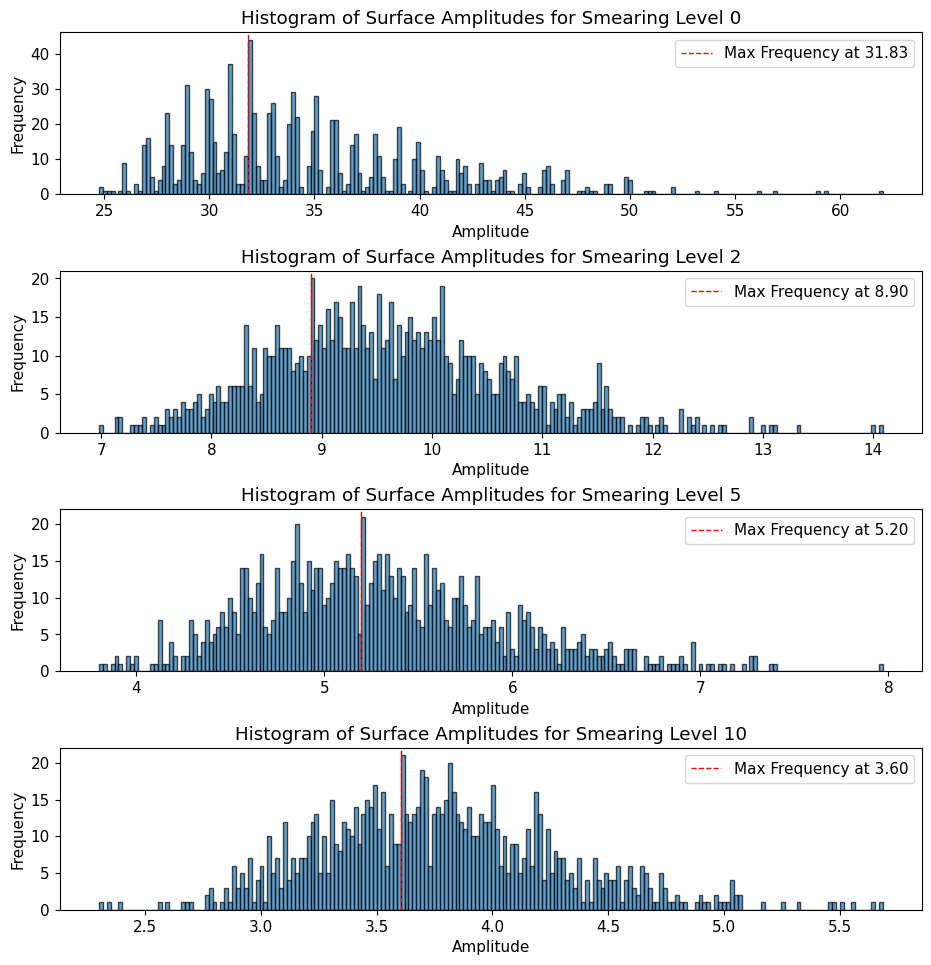

{'0': (34.764948399999994, 24.7549, 62.01349999999999), '2': (9.60572729, 6.9787000000000035, 14.087299999999999), '5': (5.29706494, 3.8008000000000024, 7.970299999999995), '10': (3.7648498239999997, 2.2997999999999976, 5.686699999999995)}


In [11]:
indices = sf.surface_amplitudes(smooth_surfaces=smooth_surfaces, return_threshold=40,thermalization=1000)

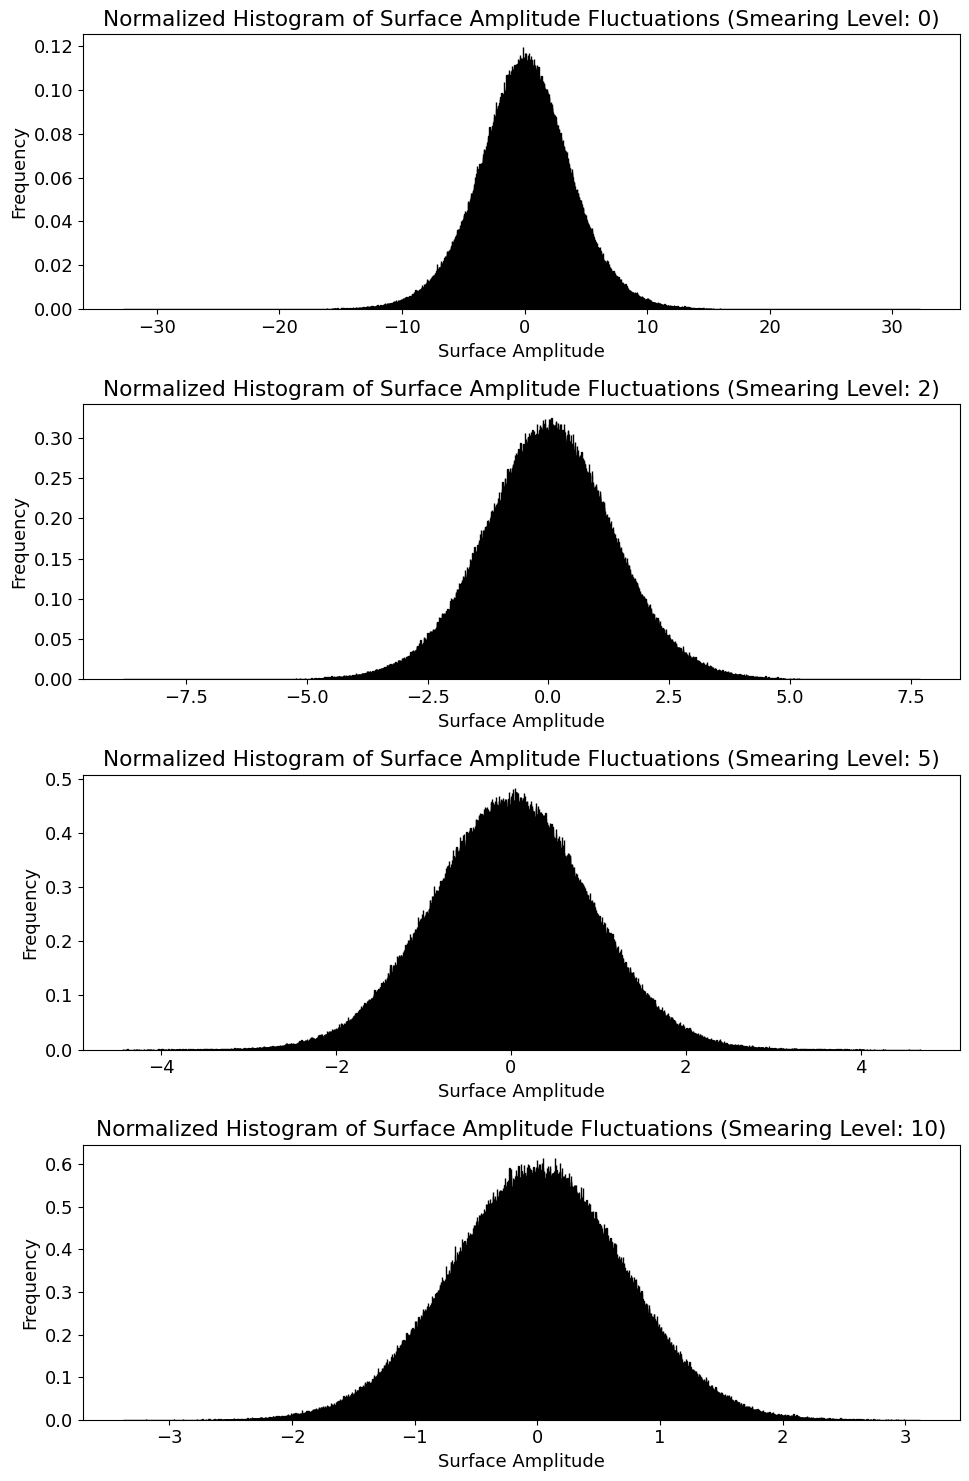

In [15]:
# Create a dictionary to store fluctuations for each smearing level
fluctuations_dict = {}
thermalization = 1000
plt.rcParams.update({'font.size': 13})

for smearing_level, surface_data in smooth_surfaces.items():
    post_thermalization_data = surface_data[thermalization:]
    mean_z_values = np.mean(post_thermalization_data[:, :, 2], axis=1)
    fluctuations = post_thermalization_data[:, :, 2] - mean_z_values[:, np.newaxis]
    fluctuations_dict[smearing_level] = fluctuations.flatten()
    
# Plotting all histograms in subplots
num_plots = len(fluctuations_dict)
fig, axes = plt.subplots(num_plots, 1, figsize=(10,15))

# If there is only one histogram to be plotted, axes is not an array
if num_plots == 1:
    axes = [axes]

for ax, (smearing_level, fluctuations) in zip(axes, fluctuations_dict.items()):
    ax.hist(fluctuations, edgecolor='black', bins=64*100, density=True)
    ax.set_xlabel('Surface Amplitude')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Normalized Histogram of Surface Amplitude Fluctuations (Smearing Level: {smearing_level})')

plt.tight_layout()
plt.show()


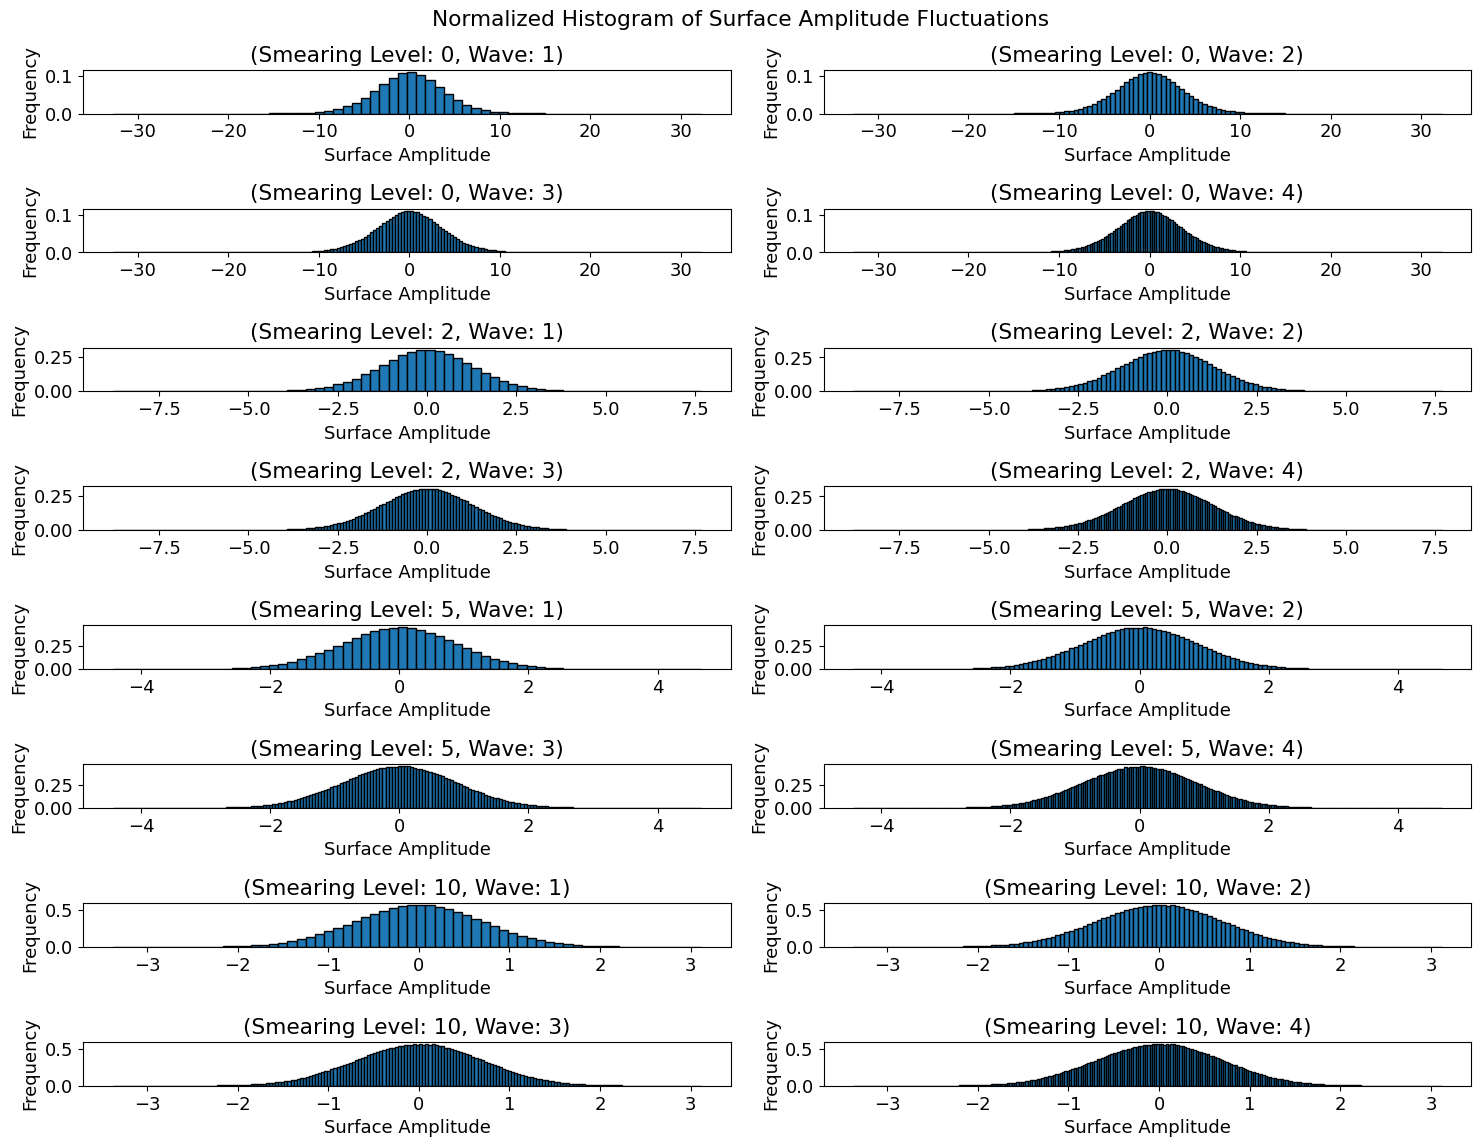

In [16]:
# Create a dictionary to store fluctuations for each smearing level
fluctuations_dict = {}
thermalization = 1000
plt.rcParams.update({'font.size': 13})
num_waves = 4
z = int(folder.split("-")[-2])
for smearing_level, surface_data in smooth_surfaces.items():
    post_thermalization_data = surface_data[thermalization:]
    mean_z_values = np.mean(post_thermalization_datathermalization+10000[:, :, 2], axis=1)
    fluctuations = post_thermalization_data[:, :, 2] - mean_z_values[:, np.newaxis]
    fluctuations_dict[smearing_level] = fluctuations.flatten()
    
# Plotting all histograms in subplots
num_plots = len(fluctuations_dict) * num_waves
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 11.7))  # A4 size in inches (landscape)

# Flatten axes array for easy iteration
axes = axes.flatten()

plot_index = 0
for smearing_level, fluctuations in fluctuations_dict.items():
    for wave in range(1, num_waves + 1):
        ax = axes[plot_index]
        ax.hist(fluctuations, edgecolor='black', bins=z * wave, density=True)
        ax.set_xlabel('Surface Amplitude')
        ax.set_ylabel('Frequency')
        ax.set_title(f'(Smearing Level: {smearing_level}, Wave: {wave})')
        plot_index += 1
fig.suptitle('Normalized Histogram of Surface Amplitude Fluctuations')
# Hide any unused subplots
for ax in axes[plot_index:]:
    ax.axis('off')

plt.tight_layout()
plt.show()